# Repte Octubre - Models de classificació

In [65]:
#!pip install sklearn

In [478]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns
from pprint import pprint

# Preprocesado y análisis
# ==============================================================================
#import statsmodels.api as sm
#import pingouin as pg
from scipy import stats
import random as rd
from imblearn.over_sampling import SMOTE

# Preprocesado y modelado
# ==============================================================================
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_text
from sklearn.inspection import permutation_importance
import multiprocessing
from sklearn import neighbors, datasets, preprocessing
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
import statsmodels.api as sm
from sklearn.model_selection import cross_val_predict
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.pipeline import Pipeline 
from sklearn.feature_selection import VarianceThreshold


# Test Estadísticos
# ==============================================================================
from scipy.stats import shapiro
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel

# Ajuste de distribuciones
# ==============================================================================
from scipy import stats
import inspect
from statsmodels.distributions.empirical_distribution import ECDF


# Configuración matplotlib
# ==============================================================================
plt.style.use('ggplot')
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

## 1. DataFrame

Features: El dataset contiene 6 features en 6 columnas, que son los parámetros medidos por los diferentes sensores.Estos corresponden a las vibraciones detectadas en ciertos puntos de la ladera del volcán.

Target: El target corresponde al 'label' que clasifica los tipos de erupciones volcánicas en función de los features medidos por los sensores.

* Target 0 corresponde a una erupción de tipo Pliniana
* Target 1 corresponde a una erupción de tipo Peleana
* Target 2 corresponde a una erupción de tipo Vulcaniana
* Target 3 corresponde a una erupción de tipo Hawaiana
* Target 4 corresponde a una erupción de tipo Estromboliana

In [479]:
df= pd.read_csv(r"C:\Users\hecto\OneDrive\Documentos\IT Data Science\Reto octubre\data\jm_train.csv",header=0)

In [480]:
df.shape

(2100, 7)

In [481]:
df.head(3)

,feature1,feature2,feature3,feature4,feature5,feature6,target
0,0.474335,0.881640,-2.050543,-1.251935,-1.035151,-1.934367,4
1,-1.034675,1.741801,-1.660629,-1.555989,-0.337553,-2.473838,0
2,-0.563221,-0.688381,-0.318415,-1.845172,0.352366,-0.912928,1


In [482]:
y=df["target"]
y.head(3)

0    4
1    0
2    1
Name: target, dtype: int64

In [483]:
data_test= pd.read_csv(r"C:\Users\hecto\OneDrive\Documentos\IT Data Science\Reto octubre\data\jm_X_test.csv",header=0)

In [484]:
data_test.head(3)

,feature1,feature2,feature3,feature4,feature5,feature6
0,0.943723,-2.985473,-0.938218,3.580261,-3.038106,2.080338
1,-0.899819,1.295568,1.274513,0.718186,1.117035,0.463068
2,0.293281,-0.099317,1.874902,-0.589582,1.828441,1.011596


In [485]:
data_test.shape

(900, 6)

## 2. Análisis Exploratorio

### 2.1 Check null values

In [486]:
print('The dataset has', df.shape[0], 'rows and', df.shape[1], 'columns.')

The dataset has 2100 rows and 7 columns.


In [487]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feature1  2100 non-null   float64
 1   feature2  2100 non-null   float64
 2   feature3  2100 non-null   float64
 3   feature4  2100 non-null   float64
 4   feature5  2100 non-null   float64
 5   feature6  2100 non-null   float64
 6   target    2100 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 115.0 KB


In [488]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
feature1,2100.0,-0.20,1.54,-6.68,-1.17,-0.44,0.89,4.57
feature2,2100.0,0.20,1.61,-5.38,-0.88,0.32,1.32,6.70
feature3,2100.0,-0.38,1.45,-6.15,-1.37,-0.44,0.66,4.16
feature4,2100.0,-0.21,1.44,-5.65,-1.26,-0.18,0.87,4.37
feature5,2100.0,-0.19,1.50,-5.91,-1.21,-0.20,0.85,5.07
feature6,2100.0,-0.43,1.19,-4.43,-1.13,-0.41,0.35,4.02
target,2100.0,1.98,1.41,0.00,1.00,2.00,3.00,4.00


### 2.2 Matriz de Correlaciones

#### 2.2.1 Matriz ce correlaciones del data inicial

<AxesSubplot:>

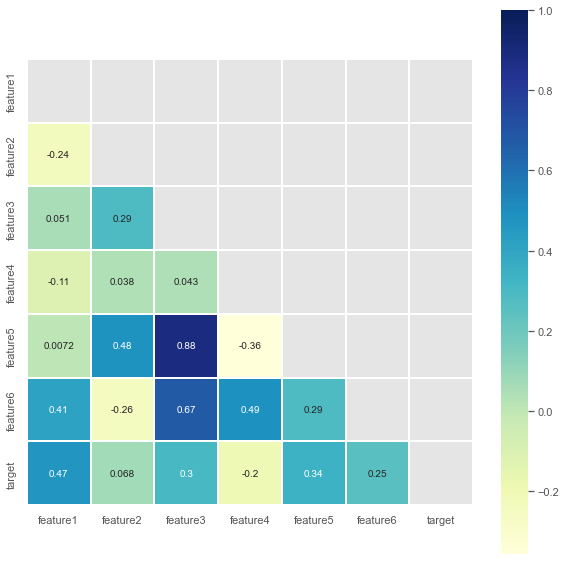

In [489]:
plt.figure(figsize=(10,10))
corr = df.corr()
upp_mat = np.triu(corr)
colormap = plt.cm.YlGnBu
sns.heatmap(corr,linewidths=0.1,vmax=1.0,cmap=colormap,linecolor='white', square = True,annot=True,mask = upp_mat)

* Entre la variable objetivo y las variables explicativas, existe una correlación que no supera el (+-) 0.3 con la mayoría de variables, salvo con feature1 que es del 0.47.
* También se producen correlaciones elevadas entre las variables explitativas, superiores en varios casos al (+-) 0.8 por lo que pueden darse problemas de multicolinealidad entre feature3 y 5

#### 2.2.2 Matriz de correlaciones del data test

<AxesSubplot:>

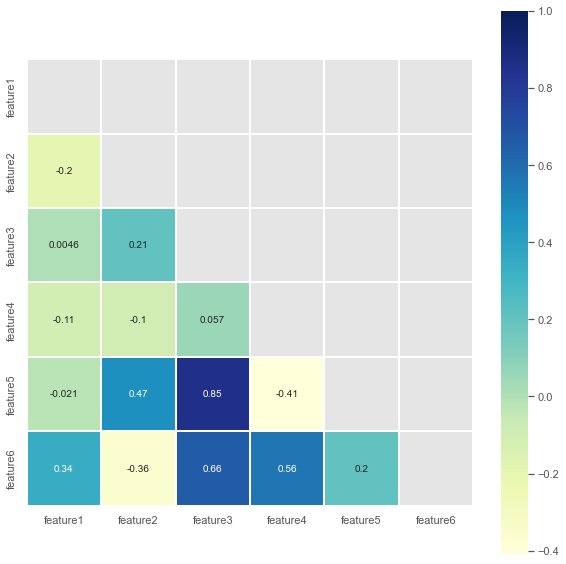

In [491]:
plt.figure(figsize=(10,10))
corr = data_test.corr()
upp_mat = np.triu(corr)
colormap = plt.cm.YlGnBu
sns.heatmap(corr,linewidths=0.1,vmax=1.0,cmap=colormap,linecolor='white', square = True,annot=True,mask = upp_mat)

* Las correlaciones de data_test mantiene los mismos parámetros que la anterior

#### 2.2.3 Gráficos por pares en función de la variable 'target'

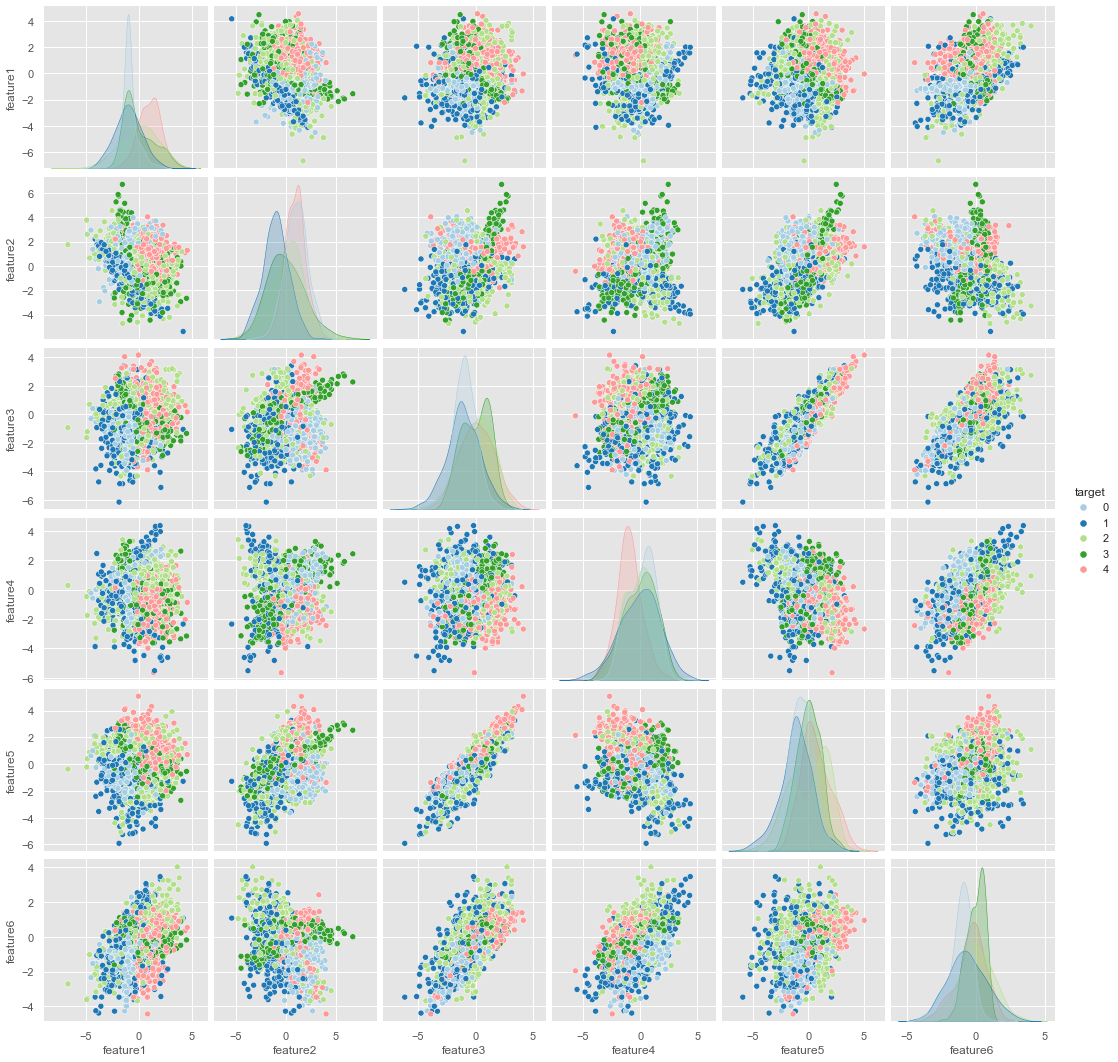

In [492]:
sns.pairplot(df , hue='target', palette = 'Paired');

* En la distribución por pares se observa que existe una clara correlación entre algunas variables, por lo que vamos a analizar si este fenómeno nos afectará negativamente en nuestro modelo.

#### 2.2.4 Estimación de la multicolinealidad con VIF (Variance Inflation Factor)

Según Hanke, y Wichern (2010)la multicolinealidad es la situación en la cual las variables independientes de una ecuación de regresión múltiple están sumamente intercorrelacionadas. Es decir, existe una relación lineal entre dos o más variables independientes. La multicolinealidad se refiere a que dos o más variables pueden contener información repetida.
El impacto que tiene la multicolinealidad en las variables se puede medir mediante un indicador que se conoce como Factor de Inflación de la Varianza o VIF por sus siglas en inglés (variance inflation factor):

* VIF = 1 / (1-R^2)
    
* Si el valor de VIF es cercano a 1 se puede interpretar que la multicolinealidad no es un gran problema para la variable en cuestión. Un valor de VIF más grande que 1implica que el coeficiente de esa variable puede ser modificado de manera importante conforme se tomen en cuenta a las demás variables en el modelo de regresión.En última instancia,un valor de VIF alto implica que existe información redundante en las variables independientesy que, por lo tanto, cada vez que una de estas variables se modifique,el coeficiente de otra variable puede ser afectado.
* La regla general para decidir sobre la corección de la multicolinealidad es la siguiente: 
    1. VIF=1 significa que no existe correlación entre esta variable independiente y cualquier otra. 
    2.  1< VIF < 5 sugiere una correlación moderada pero no sería necesario resolverla.
    3. VIF > 5 son niveles críticos de multicolinealidad.

In [493]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
    
X_vif =df[['feature3','feature5','feature6']]
  
vif_data = pd.DataFrame() 
vif_data["feature"] = X_vif.columns 
  
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) 
                          for i in range(len(X_vif.columns))] 
  
print(vif_data)

    feature        VIF
0  feature3  40.155268
1  feature5  22.776180
2  feature6  10.008459


* El resultado Vif superior a 5 nos sugiere la posibilidad de que alguna de las variables pueda ser excluída, pero en nuestro caso, analizaremos el modelo con todas las variables, y excluiremos feature3 para ver si mejora o no las métricas, y en función de esos resultados se decidirá sobre la posibilidad de excluir alguna variable.

### 2.3 Distribución de las variables explicativas por tipo de 'target'

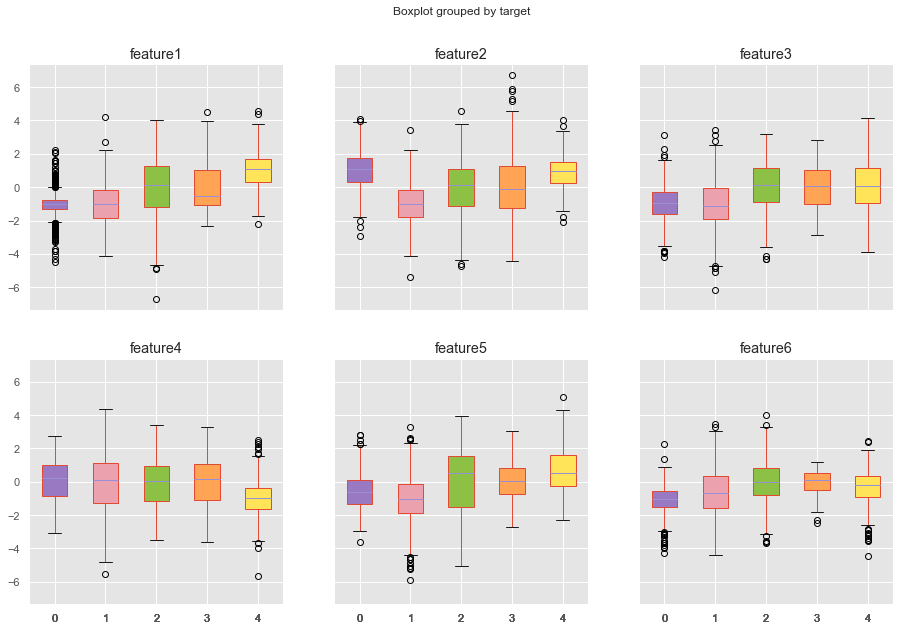

In [494]:
bp_dict = df.boxplot(
by="target",layout=(2,3),figsize=(15,10), 
return_type='both',
patch_artist = True,
)
colors =["#9979c1", "#eba2ae", "#8dc146", '#ffa455', '#ffe358', '#bde2f2']

for row_key, (ax,row) in bp_dict.iteritems():
    ax.set_xlabel('')
    
    for i,box in enumerate(row['boxes']):
        box.set_facecolor(colors[i])
        
plt.show()

* El gráfico boxplot muestra el coportamiento de la distribución de las variables en los diferentes percentiles en relación a la mediana, así como las variables con más outliers en función del tipo de clasificación.
* La Case Pliniana(0) es la que tiene más outliers en la distribución de la mayoría de variables explicativas,

## 3. Preprocesado de la información

In [495]:
df.isnull().values.any()

False

In [496]:
df.isna().values.any()

False

In [497]:
features = df.columns.values
features

array(['feature1', 'feature2', 'feature3', 'feature4', 'feature5',
       'feature6', 'target'], dtype=object)

### 3.1 Gráficos de Frecuencia y boxplot de las variables del data set inicial

<Figure size 576x360 with 0 Axes>

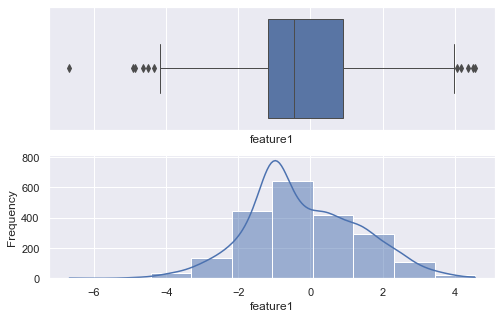

<Figure size 576x360 with 0 Axes>

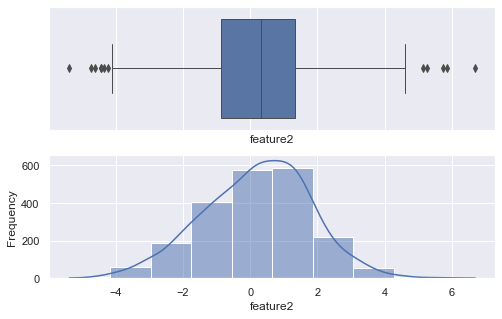

<Figure size 576x360 with 0 Axes>

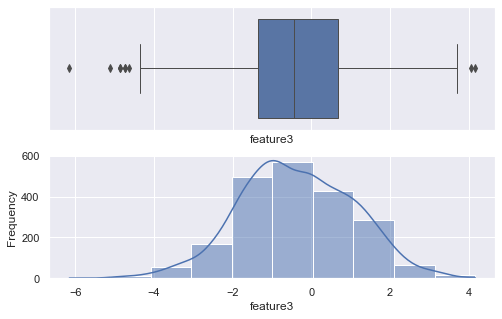

<Figure size 576x360 with 0 Axes>

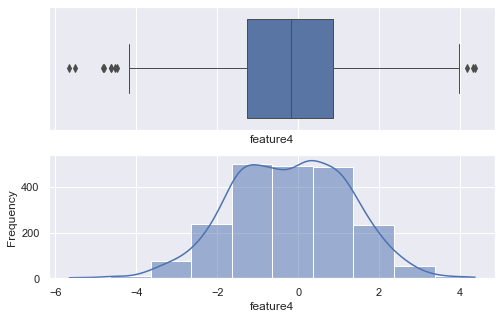

<Figure size 576x360 with 0 Axes>

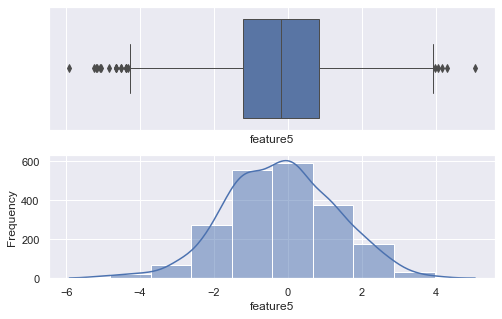

<Figure size 576x360 with 0 Axes>

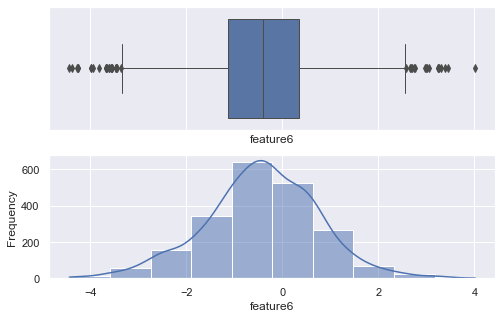

<Figure size 576x360 with 0 Axes>

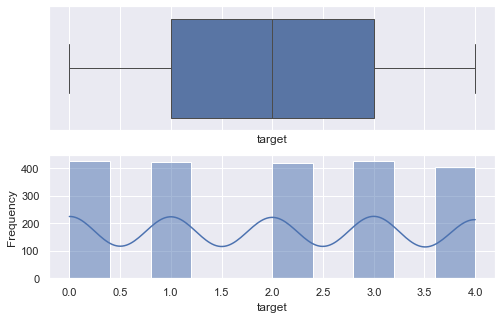

In [498]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

for i in df.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df[i],  ax=ax_box , linewidth= 1.0)
    sns.histplot(df[i], ax=ax_hist , bins = 10,kde=True)

### 3.2 Análisis de la normalidad

In [499]:
# import library for test
from scipy.stats import shapiro

# create a function that checks if the distribution is normal: 
def check_normal_distribution(data): 
    
    for i in data[features]: 
        stat, p_value_norm = shapiro(data[i])
        print(f'Results for {i}:')
        print('stat=%.3f, p=%.3f' % (stat, p_value_norm))
    
        if p_value_norm < 0.05 : 
            print("Reject null hypothesis at 95% Significance Level  >> The data is not normally distributed")
            print('----------------------------------------------------------------------------------------------')
        else: 
            print("Fail to reject null hypothesis at 95€ Significance Level  >> The data is normally distributed")
            print('----------------------------------------------------------------------------------------------')

In [500]:
check_normal_distribution(df[features])

Results for feature1:
stat=0.989, p=0.000
Reject null hypothesis at 95% Significance Level  >> The data is not normally distributed
----------------------------------------------------------------------------------------------
Results for feature2:
stat=0.996, p=0.000
Reject null hypothesis at 95% Significance Level  >> The data is not normally distributed
----------------------------------------------------------------------------------------------
Results for feature3:
stat=0.998, p=0.005
Reject null hypothesis at 95% Significance Level  >> The data is not normally distributed
----------------------------------------------------------------------------------------------
Results for feature4:
stat=0.997, p=0.000
Reject null hypothesis at 95% Significance Level  >> The data is not normally distributed
----------------------------------------------------------------------------------------------
Results for feature5:
stat=0.998, p=0.004
Reject null hypothesis at 95% Significance Level  

* Ninguna variable se distribuye normalmente

### 3.3 RobustScaler

* Ninguna variable expicativa sigue una distribución normal, se aplica RobustScaler, para solucionar los outliers que apararcen en muchas de las variables.

In [501]:
from sklearn.preprocessing import RobustScaler
df=df.drop(["target"],axis=1)
features2 = df.columns.values
features2

array(['feature1', 'feature2', 'feature3', 'feature4', 'feature5',
       'feature6'], dtype=object)

In [502]:
from sklearn.preprocessing import RobustScaler
normColumns = features2
scalerNorm = preprocessing.RobustScaler().fit(df[normColumns])# RobustEscaler
df[normColumns] = scalerNorm.transform(df[normColumns])

<Figure size 576x360 with 0 Axes>

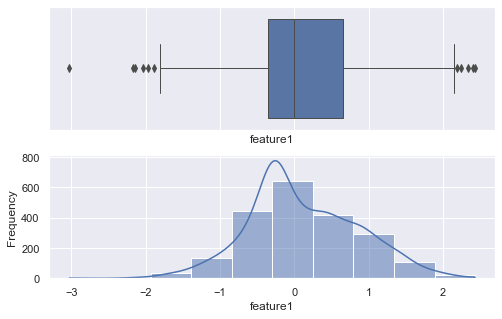

<Figure size 576x360 with 0 Axes>

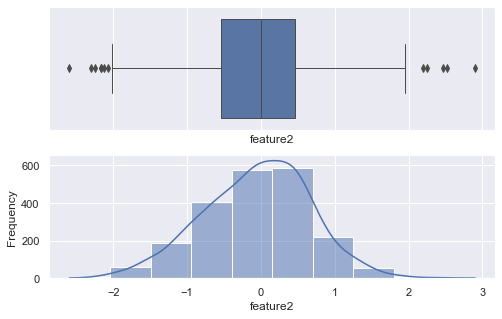

<Figure size 576x360 with 0 Axes>

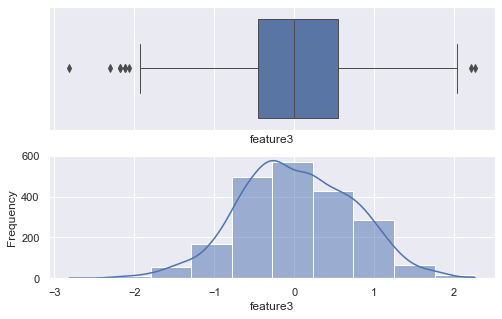

<Figure size 576x360 with 0 Axes>

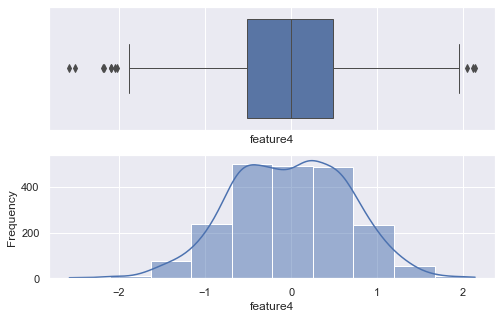

<Figure size 576x360 with 0 Axes>

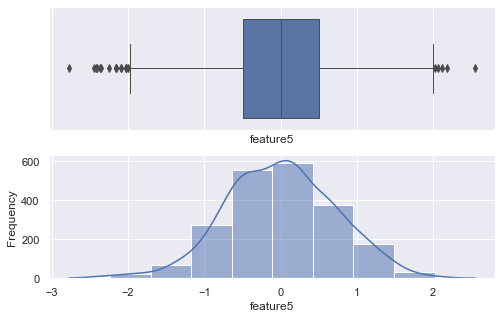

<Figure size 576x360 with 0 Axes>

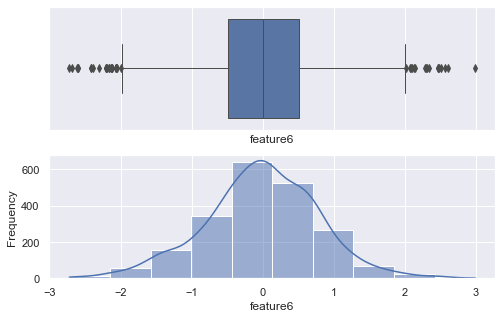

In [503]:
for i in df.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df[i],  ax=ax_box , linewidth= 1.0)
    sns.histplot(df[i], ax=ax_hist , bins = 10,kde=True)

* Las estadísticas de centrado y escalamiento de RobustScaler se basan en percentiles y no están influenciadas por unos pocos valores atípicos marginales muy grandes.
* El rango resultante de los valores de las características transformadas es mayor que para la estandarización o normalización y son aproximadamente similares. La mayoría de los valores transformados se encuentran en un rango [-3, 3].
* Los valores atípicos todavía están presentes en los datos transformados. Si se desearamos un recorte de valores atípicos por separado, se debería aplicar una transformación no lineal.

### 3.4 Robust Scaler de data_test

In [504]:
features2

array(['feature1', 'feature2', 'feature3', 'feature4', 'feature5',
       'feature6'], dtype=object)

In [505]:
from sklearn.preprocessing import RobustScaler
df_test=data_test
normColumns = features2
scalerNorm = preprocessing.RobustScaler().fit(df_test[normColumns])# RobustEscaler
df_test[normColumns] = scalerNorm.transform(df_test[normColumns])


<Figure size 576x360 with 0 Axes>

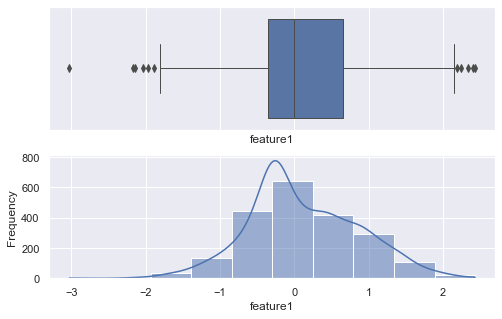

<Figure size 576x360 with 0 Axes>

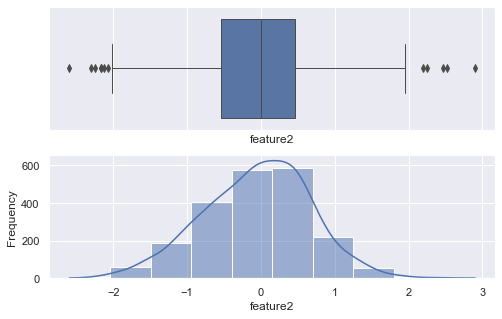

<Figure size 576x360 with 0 Axes>

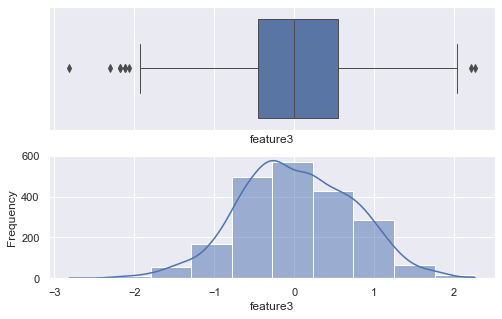

<Figure size 576x360 with 0 Axes>

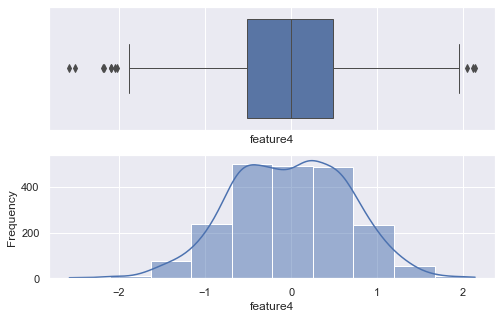

<Figure size 576x360 with 0 Axes>

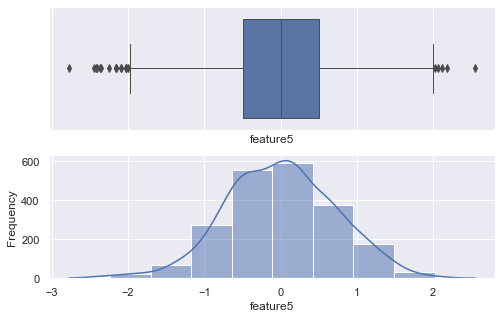

<Figure size 576x360 with 0 Axes>

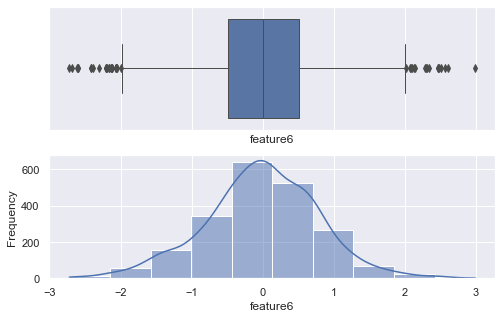

In [506]:
for i in df_test.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df[i],  ax=ax_box , linewidth= 1.0)
    sns.histplot(df[i], ax=ax_hist , bins = 10,kde=True)

## 4. Test/train

### 4.1 Test/train sobre la base de datos inical

In [507]:
df.head(3)

,feature1,feature2,feature3,feature4,feature5,feature6
0,0.445434,0.255198,-0.793932,-0.505780,-0.406779,-1.031797
1,-0.286610,0.646391,-0.601750,-0.648778,-0.068718,-1.396172
2,-0.057900,-0.458832,0.059801,-0.784782,0.265622,-0.341886


In [508]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
feature1,2100.0,0.116045,0.748831,-3.027019,-0.352908,0.000000e+00,0.647092,2.430146
feature2,2100.0,-0.055147,0.734042,-2.594068,-0.544790,-1.260385e-17,0.455210,2.901392
feature3,2100.0,0.030364,0.714947,-2.813024,-0.456528,-1.366095e-17,0.543472,2.265903
feature4,2100.0,-0.014072,0.678285,-2.575900,-0.509292,6.505213e-18,0.490708,2.139141
feature5,2100.0,0.004523,0.727673,-2.770387,-0.492329,0.000000e+00,0.507671,2.551230
feature6,2100.0,-0.017882,0.802946,-2.719578,-0.489815,-1.875670e-17,0.510185,2.987483


In [509]:
df.shape

(2100, 6)

In [510]:
y.head(3)

0    4
1    0
2    1
Name: target, dtype: int64

In [511]:
from sklearn.model_selection import train_test_split
X = df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=123)

In [512]:
X_train.shape

(1470, 6)

In [513]:
y_train.shape

(1470,)

### 4.2 Test/train sin tener en cuenta feature3

In [514]:
from sklearn.model_selection import train_test_split
X_sinF3 = df.drop(['feature3'],axis=1)
X_train_sinF3, X_test_sinF3, y_train_sinF3, y_test_sinF3 = train_test_split(X_sinF3, y, test_size = 0.3,random_state=123)

In [515]:
X_train_sinF3.shape

(1470, 5)

In [516]:
y_train_sinF3.shape

(1470,)

## 5. Modelos

In [564]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=123)
rf_sinF3 = RandomForestClassifier(random_state=123)

#### Training the models

In [565]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=123)

In [566]:
rf_sinF3.fit(X_train_sinF3, y_train_sinF3)

RandomForestClassifier(random_state=123)

In [567]:
y_pred_rf = rf.predict(X_test)
y_pred_rf[:10]

array([0, 3, 3, 2, 0, 2, 3, 4, 3, 3], dtype=int64)

In [568]:
y_pred_rf_sinF3 = rf_sinF3.predict(X_test_sinF3)
y_pred_rf[:10]

array([0, 3, 3, 2, 0, 2, 3, 4, 3, 3], dtype=int64)

## 6. Evaluación

### 6.1 Métricas del modelo

* F1 score es una métrica muy empleada porque nos resume la precisión y sensibilidad en una sola métrica. 
* F1= (2*precisión *sensibilidad)/(precisión + sensibilidad)

donde, 
* Matriz de confusión: es una herramienta que permite visualizar el desempeño de un algoritmo  de aprendizaje supervisado. Cada columna de la matriz representa el número de predicciones de cada clase, mientras que cada fila representa a las instancias en la clase real., o sea en términos prácticos nos permite ver  qué tipos de aciertos y errores está teniendo nuestro modelo a la hora de pasar por el proceso de aprendizaje con los datos.
* Precisión: Se representa por la proporción de verdaderos positivos dividido entre todos los resultados positivos (tanto verdaderos positivos, como falsos positivos)
* Sensibilidad: Tasa de Verdaderos Positivos (True Positive Rate) ó TP.


### 6.1 Resultados Random Forest Classifier con data inicial

In [569]:
from sklearn.metrics import confusion_matrix
cf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

[Text(0.5, 1.0, 'Confusion matrix for RF')]

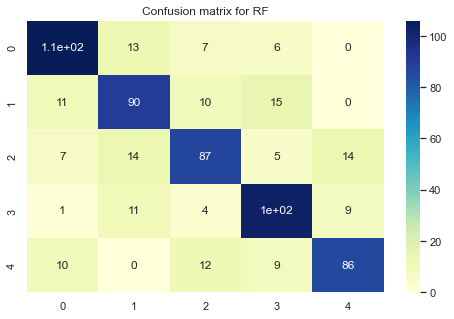

In [570]:
sns.heatmap(cf_matrix_rf,cmap="YlGnBu", annot=True).set(title='Confusion matrix for RF')

In [571]:
from sklearn.metrics import f1_score
f1_rf = f1_score(y_test, y_pred_rf, average='macro')
print("F1 for RF: {:.4f}".format(f1_rf) )

F1 for RF: 0.7485


### 6.2 Resultados Random Forest Classifier sin feature 3

[Text(0.5, 1.0, 'Confusion matrix for RF sin F3')]

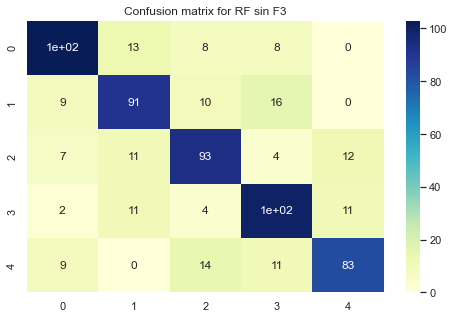

In [572]:
cf_matrix_rf_sinF3 = confusion_matrix(y_test_sinF3, y_pred_rf_sinF3)
sns.heatmap(cf_matrix_rf_sinF3,cmap="YlGnBu", annot=True).set(title='Confusion matrix for RF sin F3')

In [573]:
f1_rf_sinF3 = f1_score(y_test_sinF3, y_pred_rf_sinF3, average='macro')
print("F1 for RF: {:.4f}".format(f1_rf_sinF3) )

F1 for RF: 0.7457


* Los resultados obtenidos para F1 sin tener en cuenta la variable explicativa feature3, 0.7457 son inferiores a los obtenidos teniendo en cuenta todas las variables 0.7485, por lo que realizaremos los sucesivos ajustes sobre la base de datos inical completa.

## 7. Cross Validation

In [574]:
# Cross Validation
from sklearn.model_selection import cross_val_score

cv_rf = cross_val_score(rf, X, y, cv=5, scoring='f1_macro')
print("F1 for RF Base mean: {:.4f}, std: {:.4f}".format(cv_rf.mean(), cv_rf.std()) )

F1 for RF mean: 0.7744, std: 0.0088


* El modelo Random Forest base una F1 más elevada en la validación cruzada y pasa de una F1 de 0.7485 a 0,7744 con una desviación stándar de 0.0088

In [575]:
from pprint import pprint
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 123,
 'verbose': 0,
 'warm_start': False}


## 8. Mejores Parámetros

### 8.1 Mejores parámetros con RandomSearch

In [585]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = np.linspace(50, 2000, 20, dtype=int)

# Number of features to consider at every split
max_features = [0.4, 'sqrt']

max_depth = [10, 20]

params= {'n_estimators': n_estimators,
          'max_features': max_features, 
           'max_depth': max_depth
        }

rsearch = RandomizedSearchCV(estimator=rf,
                             param_distributions=params,cv=5,
                             n_iter=40,random_state=123,scoring='f1_macro')
rsearch.fit(X_train, y_train)

# Mejores hiperparámetros por validación cruzada
# =====================================================================
print("--------------------------------------")
print("Mejores hiperparámetros encontrados")
print("--------------------------------------")
print(rsearch.best_params_, ":", rsearch.best_score_, rsearch.scoring)

--------------------------------------
Mejores hiperparámetros encontrados
--------------------------------------
{'n_estimators': 460, 'max_features': 0.4, 'max_depth': 10} : 0.7611009642067643 f1_macro


In [553]:
rf_rand=rsearch.best_estimator_

In [554]:
# Cross Validation
from sklearn.model_selection import cross_val_score

cv_rf_rand = cross_val_score(rf_rand, X, y, cv=5, scoring='f1_macro')
print("F1 for RF mean: {:.4f}, std: {:.4f}".format(cv_rf_rand.mean(), cv_rf_rand.std()) )

F1 for RF mean: 0.7691, std: 0.0091


### 8.2 Mejores parámetros con GridSearch

In [540]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {'n_estimators': [100,200,250],
              'max_features': ['sqrt',0.4],
              'max_depth'   : [None, 10],
              'criterion'   : ['gini', 'entropy']
             }

# Búsqueda por grid search con validación cruzada
# ==============================================================================
rsearch = GridSearchCV(
        estimator  = RandomForestClassifier(random_state = 123),
        param_grid = param_grid,
        scoring    = 'f1_macro',
        n_jobs     = None, #multiprocessing.cpu_count() - 1,
        cv         = 5, #RepeatedKFold(n_splits=5, n_repeats=3, random_state=123), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

rsearch.fit(X_train, y_train)

# Resultados
# ==============================================================================
resultados = pd.DataFrame(rsearch.cv_results_)
resultados.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

,param_criterion,param_max_depth,param_max_features,param_n_estimators,mean_test_score,std_test_score,mean_train_score,std_train_score
6,gini,10,sqrt,100,0.763295,0.024434,0.986761,0.001551
9,gini,10,0.4,100,0.763295,0.024434,0.986761,0.001551
8,gini,10,sqrt,250,0.759034,0.017669,0.988958,0.001062
11,gini,10,0.4,250,0.759034,0.017669,0.988958,0.001062


In [584]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("------------------------------------")
print("Mejores hiperparámetros encontrados")
print("------------------------------------")
print(rsearch.best_params_, ":", rsearch.best_score_, rsearch.scoring)

------------------------------------
Mejores hiperparámetros encontrados
------------------------------------
{'n_estimators': 460, 'max_features': 0.4, 'max_depth': 10} : 0.7611009642067643 f1_macro


In [542]:
rf_grid=rsearch.best_estimator_

In [562]:
# Cross Validation
from sklearn.model_selection import cross_val_score

cv_rf_grid = cross_val_score(rf_grid, X, y, cv=5, scoring='f1_macro')
print("F1 for RF mean: {:.4f}, std: {:.4f}".format(cv_rf_grid.mean(), cv_rf_grid.std()) )

F1 for RF mean: 0.7722, std: 0.0071


### 8.3 Resumen de métricas

In [586]:
print("F1 for RF Base Cros Validation F1: {:.4f}, std: {:.4f}".format(cv_rf.mean(), cv_rf.std()))
print("F1 for RF RandomSearhc Cross_V F1: {:.4f}, std: {:.4f}".format(cv_rf_rand.mean(), cv_rf_rand.std()))
print("F1 for RF GridSearch Cross_V   F1: {:.4f}, std: {:.4f}".format(cv_rf_grid.mean(), cv_rf_grid.std()) )

F1 for RF Base Cros Validation F1: 0.7744, std: 0.0088
F1 for RF RandomSearhc Cross_V F1: 0.7691, std: 0.0091
F1 for RF GridSearch Cross_V   F1: 0.7722, std: 0.0071


* Finalmente realizaremos la predicción sobre Random Forest GridSearch con Cross Validation, porque aunque tiene un F1 inferior al modelo Base, la desviación estándar de la métrica es inferior y en el conjunto de las dos métricas es el que consideramos óptimo.

### 8.4 ROC Curve sobre modelo final

In [587]:
rf_max = rf_grid

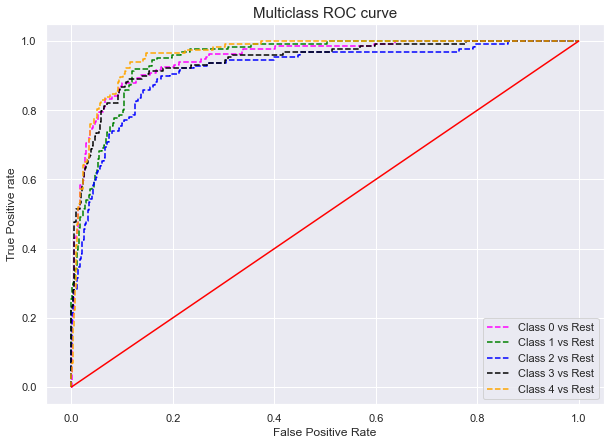

In [588]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

rf_max_predict_proba = rf_max.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

# defining number of classes 
n_class = 5

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, rf_max_predict_proba[:,i], pos_label=i)
    
# plotting    
plt.figure(figsize = (10,7))
plt.plot(fpr[0], tpr[0], linestyle='--',color='magenta', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='black', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='orange', label='Class 4 vs Rest')
plt.plot([0, 1], [0, 1], color = 'red')
plt.title('Multiclass ROC curve', fontsize = 15)
plt.grid(True)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()   

## 9. Predicciones sobre el Modelo Final

In [593]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feature1  900 non-null    float64
 1   feature2  900 non-null    float64
 2   feature3  900 non-null    float64
 3   feature4  900 non-null    float64
 4   feature5  900 non-null    float64
 5   feature6  900 non-null    float64
dtypes: float64(6)
memory usage: 42.3 KB


In [594]:
final_predictions = rf_max.predict(df_test)
final_predictions

array([1, 3, 2, 0, 3, 2, 4, 0, 2, 3, 1, 4, 1, 1, 4, 4, 4, 3, 2, 0, 1, 2,
       3, 0, 0, 3, 0, 2, 2, 4, 2, 2, 4, 3, 3, 1, 0, 4, 3, 0, 4, 2, 3, 2,
       2, 0, 1, 1, 2, 4, 4, 0, 1, 0, 4, 4, 1, 3, 3, 0, 3, 0, 3, 0, 2, 1,
       1, 0, 1, 3, 0, 1, 4, 0, 4, 2, 0, 3, 0, 3, 4, 3, 1, 4, 3, 1, 2, 3,
       1, 2, 2, 4, 1, 1, 0, 1, 4, 2, 1, 4, 0, 0, 0, 4, 2, 4, 4, 4, 1, 2,
       4, 1, 3, 3, 3, 2, 1, 4, 2, 0, 0, 4, 4, 3, 1, 2, 4, 1, 3, 2, 2, 1,
       4, 0, 0, 0, 3, 0, 0, 4, 0, 4, 3, 2, 1, 3, 4, 3, 4, 4, 1, 2, 1, 4,
       0, 4, 1, 2, 4, 2, 0, 2, 3, 1, 1, 4, 0, 3, 2, 0, 1, 2, 0, 4, 1, 2,
       3, 1, 3, 4, 2, 1, 0, 2, 2, 2, 0, 3, 4, 1, 1, 1, 2, 4, 0, 0, 4, 4,
       1, 2, 0, 2, 4, 3, 2, 2, 3, 1, 1, 3, 0, 0, 2, 1, 1, 3, 4, 0, 2, 1,
       2, 3, 2, 0, 3, 2, 0, 2, 2, 3, 0, 2, 4, 3, 4, 4, 0, 3, 3, 3, 0, 4,
       3, 0, 2, 0, 1, 1, 2, 0, 4, 3, 1, 3, 1, 1, 0, 3, 2, 4, 2, 0, 0, 2,
       2, 4, 2, 4, 1, 2, 2, 2, 2, 0, 3, 0, 1, 4, 2, 4, 2, 1, 2, 1, 1, 4,
       1, 0, 2, 2, 3, 1, 0, 2, 0, 0, 4, 4, 1, 3, 0,

In [595]:
# save results 
final_predictions_df = pd.DataFrame({'final_status': final_predictions})
final_predictions_df.head()

,final_status
0,1
1,3
2,2
3,0
4,3


In [596]:
# save to csv file 
final_predictions_df.to_csv('predictions.csv', index = False )

#### 8. Conclusions

* RandomForest has been a very stable model and when performing CrossValidation it has given us very consistent results, so we believe that it is a robust model.
* On the other hand, it has been difficult to improve the initial results of the model, we tried several different techniques (RandomSearch, GridSearch) and we have achieved small improvements for the standar desviation. 
* It seems that the default parameters already worked well with our data.